In [2]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 


dtlist = np.array([0.003,0.0039,0.005,0.0065,0.0084,0.0109,0.014,0.0181,0.0234,0.0302])
s=10
c=0.45
tau=0.1

def U(x,y):
    res=s*(x*x+y*y-1)*(x*x+y*y-1)
    return res
def openCfile(file):
    """
    Open the C txt file in order to obtain m_1 matrix of results 
    -----------
    Input
    -----------
    file: txt file
        m_1 file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        m_1 matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

# Unbalanced double well model 

In this section, I introduced a double well model with a difficult barrier to cross to explore both well. The potential is 
\begin{equation}
    V(x) = ((x+a)^{2}-0.0001)(x-c)^{4}
\end{equation}
and the derivative of the potential is 
\begin{equation}
    V'(x) = 2(x-c)^3 ((x+a)(x-c)+2(x+a)^2-0.002).
\end{equation}
In this double well model, we explore whether the transformed SDE allows to explore the steeper and harder well to explore. 


The function we use is $f(x)=\left(x-c\right)^3$ and we bound it using 
$$
g(x)=\frac{\sqrt{1+m_1f^2(x)}}{M_1 \sqrt{(1+m_1 f(x)^2)}+\sqrt{f^2(x)}}
$$
such that 
$$
g'(x)=- \text{sign} f(x) \frac{f'(x)}{\sqrt{m_1 f(x)^2+1}\left(b \sqrt{a f(x)^2+1} +\sqrt{f(x)^2}\right)^2}
$$
and we have that $f'(x)=3(x-c)$

In [3]:
m1=0.01        #  // minimum step scale factor
M1=1./1.5             # // maximum step scale factor
numsam=5     #      // number of sample
dt=0.01 #
tau=0.1   #
T=1000
numruns=int(100/dt)  #       // total number of trajectories
print(numruns)

10000


Text(0, 0.5, '$y$')

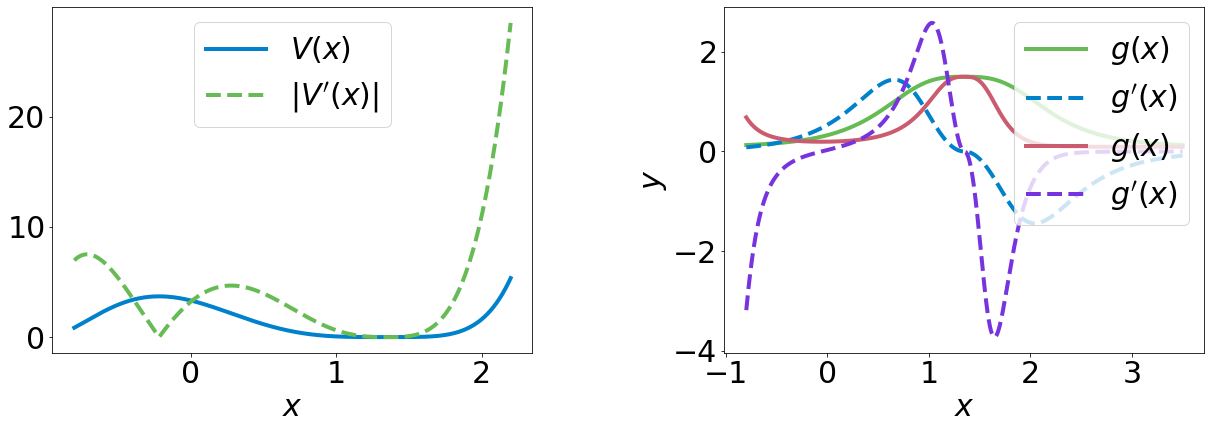

In [4]:
### Plot parameters: 
font_size = 30
line_w=4

a=0.1
c=1.35
tau=0.1


myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

########################################
a=1.
c=1.35

def U(x):
    res= ((x+a)*(x+a)-0.0001)*np.power((x-c),4)
    return res

def Up(x):
    xc =x-c
    xa=x+a
    v=2*xc*xc*xc*(xa*xc+2*xa*xa-0.0002)
    return v


def getg(x):
    f=pow(x-c,3);
    f2=f*f;
    xi=np.sqrt(1+m1*f2);
    den=M1*xi+abs(f);
    g=xi/den;
    return(g)

def getgprime(x):
    f=pow(x-c,3);
    f2=f*f;
    fp=3*pow(x-c,2);
    xi=np.sqrt(1+m1*f2);
    gp=-f*fp/(np.sqrt(f2)*xi*pow(M1*xi+abs(f),2));
    return(gp);


def getg2(x):
    f=pow(x-c,3)*2*pow(x+a,2);
    f2=f*f;
    xi=np.sqrt(1+m1*f2);
    den=M1*xi+abs(f);
    g=xi/den;
    return(g)

def getgprime2(x):
    f=pow(x-c,3)*2*pow(x+a,2);
    f2=f*f;
    fp=(x+a)*pow(x-c,2)*(3*a-2*c+5*x)*2;
    xi=np.sqrt(1+m1*f2);
    gp=-f*fp/(np.sqrt(f2)*xi*pow(M1*xi+abs(f),2));
    return(gp);

    
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-0.8,2.2,1000)


axs[0].plot(s,U(s),label="$V(x)$",linewidth=line_w,color=myblue)
axs[0].plot(s,np.abs(Up(s)),"--",label="$|V'(x)|$",linewidth=line_w,color=mygreen)
axs[0].legend(loc = "upper center",fontsize=font_size)
axs[0].set_xlabel("$x$",fontsize=font_size)
s=np.linspace(-0.8,3.5,1000)
axs[1].plot(s,np.abs(getg(s)),color=mygreen,linewidth=line_w,label="$g(x)$")
axs[1].plot(s,(getgprime(s)),"--",color=myblue,linewidth=line_w,label="$g'(x)$")

axs[1].plot(s,np.abs(getg2(s)),color=myred,linewidth=line_w,label="$g(x)$")
axs[1].plot(s,(getgprime2(s)),"--",color=mymagenta,linewidth=line_w,label="$g'(x)$")


axs[1].legend(loc = "upper right",fontsize=font_size)



axs[1].set_xlabel("$x$",fontsize=font_size)
axs[1].set_ylabel("$y$",fontsize=font_size)



## Look at distribution 

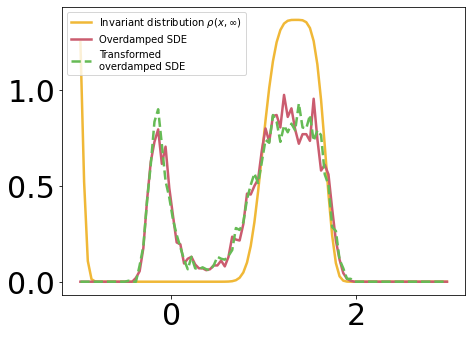

In [5]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_dw_one_sample"

# ###########################################


# Upload moments
x_re=np.hstack(openCfile(path+"/vec_re.txt"))
x_tr=np.hstack(openCfile(path+"/vec_tr.txt"))
x_noada=np.hstack(openCfile(path+"/vec_noada.txt"))
range_bins=[-1,3]
fig, ((axs))= plt.subplots(1,1,figsize=(7,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100

# SDE
histogram_sde,bins = np.histogram(x_noada,bins=nbins,range=range_bins, density=True)
midx_sde = (bins[0:-1]+bins[1:])/2


# transformed
histogram_tr,bins = np.histogram(x_tr,bins=nbins,range=range_bins, density=True)
midx_re = (bins[0:-1]+bins[1:])/2

# rescaled
histogram_re,bins = np.histogram(x_re,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# Invariant distribution
rho = np.exp(- U(midx_sde)/tau)
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

axs.plot(midx_sde,rho,linewidth=2.5,label='Invariant distribution $\\rho(x,\\infty)$',color=myyellow)
axs.plot(midx_sde,histogram_sde,"-",linewidth=2.5,label='Overdamped SDE',color=myred)
axs.plot(midx_tr,histogram_tr,"--",linewidth=2.5,label='Transformed\noverdamped SDE',color=mygreen)
axs.legend()
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
# fig.savefig("figures/onedt_doublewell.png")




## Look at the chain 


1.0622322927370724
1.1088970343296565
1.1098479473605263
1.083263596924031


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.0873907644523555


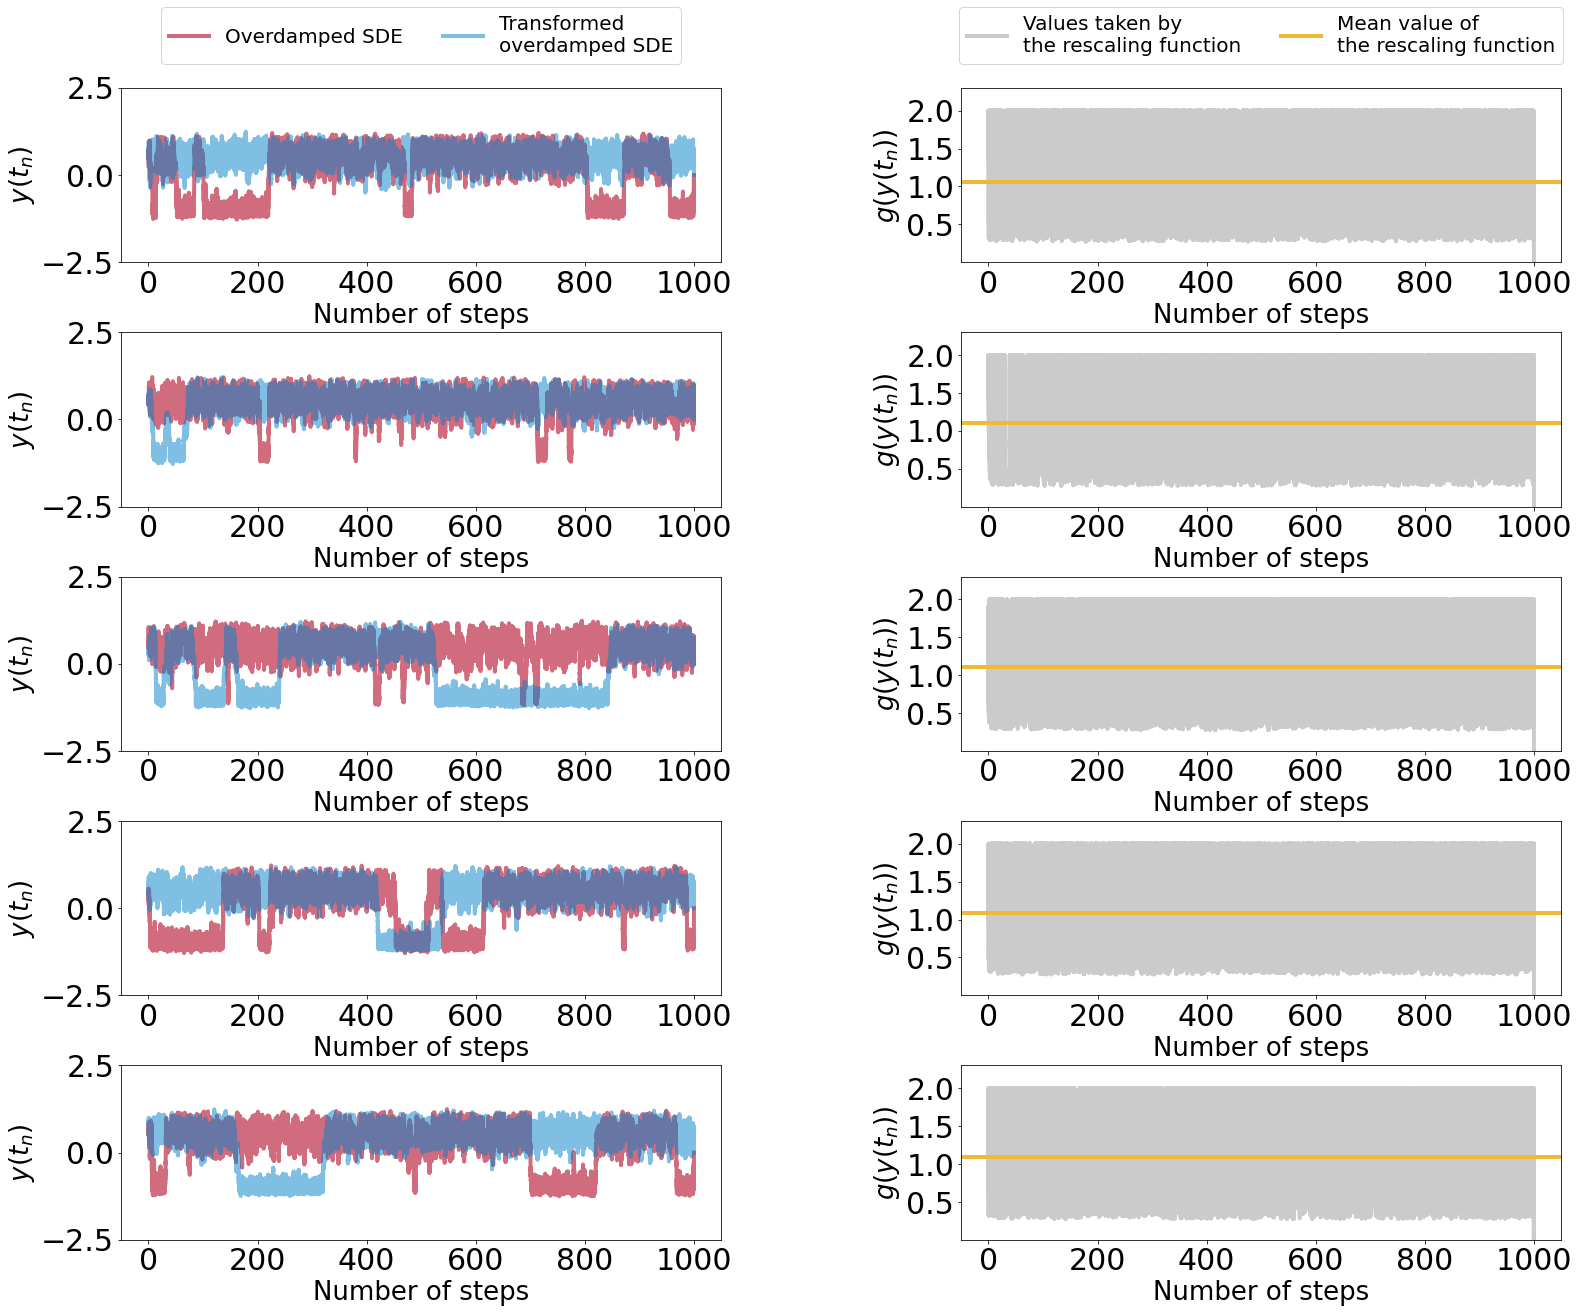

In [6]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_dw_fewtraj"

fig,((axs))= plt.subplots(numsam,2,figsize=(25,20))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20
numsam=5
for i in range(numsam):
    filename= "/vec_noada"+str(i)+".txt"
    x_noada=np.hstack(openCfile(path+filename))
    filename= "/vec_tr"+str(i)+".txt"
    x_tr=np.hstack(openCfile(path+filename))

    # vec g 
    filename= "/vec_g"+str(i)+".txt"
    gvals=np.hstack(openCfile(path+filename))
  

    ## dont take the last value 
    # q_tr=q_tr[0:-1]
    # q_noada=q_noada[0:-1]
    # gvals=gvals[0:-1]
    numruns=len(x_tr)
    t=np.linspace(0,numruns*dt+dt,numruns)


    # Q
    ###6
    axs[i,0].plot(t,x_noada,linewidth=lw,alpha=0.9,label='Overdamped SDE',color=myred)
    axs[i,0].plot(t,x_tr,linewidth=lw,alpha=0.5,label='Transformed\noverdamped SDE',color=myblue)
    axs[i,0].set_ylim(-2.5,2.5)
    axs[i,0].set_ylabel("$y(t_n)$", fontsize=font_size*1.3)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size*1.3)
    # ylabval=[-2.,-1.,0.,1.,2.]
    # labels = ["-2.","-1.","0.","1.","2."]
    # axs[i,0].set_yticks(ylabval, labels,fontsize=font_size*1.5)
   


    ############
    ## Values of g vals ## 
    ############
    range_bins_g=[0,2.5+0.1]
    # print()
    # histogram_g,bins = np.histogram(gvals,bins=nbins,range=range_bins_g, density=True)
    # midx_noada = (bins[0:-1]+bins[1:])/2
    # mean_g=round(np.mean(g),2)
    # print(mean_g)
    axs[i,1].plot(t,gvals,linewidth=lw,label='Values taken by\nthe rescaling function',color=mygrey)
    axs[i,1].axhline(np.mean(gvals),linewidth=lw,label='Mean value of\nthe rescaling function',color=myyellow)
    print(np.mean(gvals))
    axs[i,1].set_ylim(0.,2.3)
    axs[i,1].set_ylabel("$g(y(t_n))$", fontsize=font_size*1.3)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size*1.3)

    ylabval=[0.5,1.,1.5,2.]
    labels = ["0.5","1.0","1.5","2.0"]
    axs[i,1].set_yticks(ylabval, labels,fontsize=font_size*1.5)
   

    # axs[i,2].legend(fontsize=font_size, loc="upper center")

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.52))
axs[0,1].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.52))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")
fig.savefig("figures/chains_anisotropic_model.eps",dpi=1000)
fig.savefig("figures/chains_anisotropic_model.pdf")


In [7]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
a=1.
c=0.6
def U(x):
    res= ((x+a)*(x+a)-0.0001)*np.power((x-c),4)
    return res

range_int=[-1,4]
lb=range_int[0]
ub=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), lb,ub)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), lb,ub)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, lb,ub)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, lb,ub)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, lb,ub)[0],16)/norm

print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)
print(norm)

0.3101479147488382
0.41400196221281976
0.11683605572072765
0.27388529491302754
1.0136436324242522


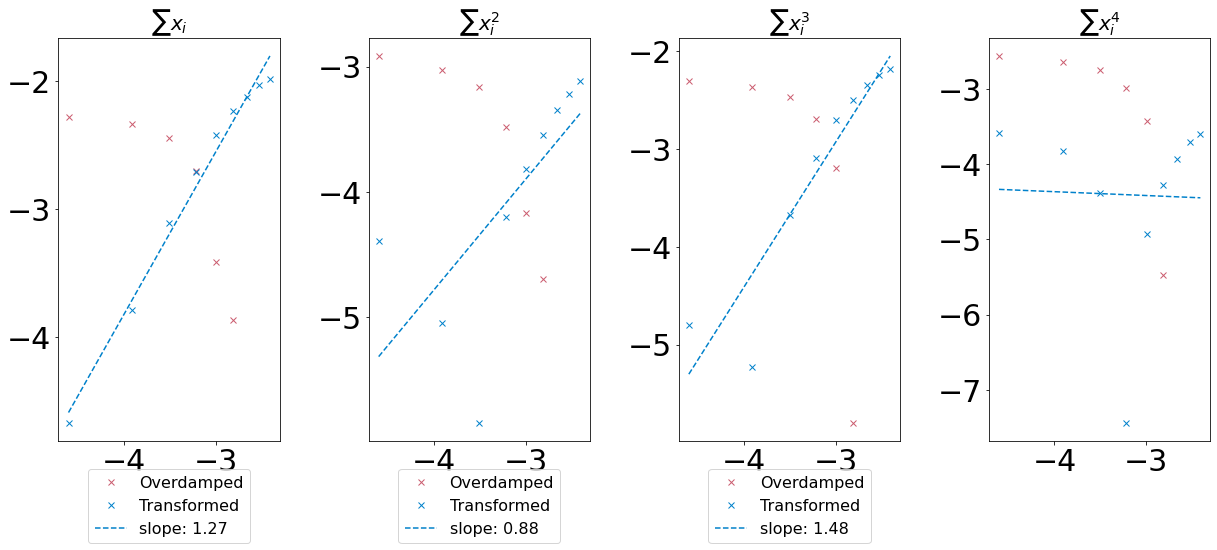

In [14]:
# from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped_dw";

dtlist=np.round(np.linspace(0.01,0.1,10),3)
# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("$\\sum x_i$",fontsize=font_size)
ax2.set_title("$\\sum x_i^2$",fontsize=font_size)
ax3.set_title("$\\sum x_i^3$",fontsize=font_size)
ax4.set_title("$\\sum x_i^4$",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/tr_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
# #fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")

# fig.savefig("figures/moments_logplot_overdamped_2d.eps")



## Try the double well with underdamped


In [15]:
dtlist

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [19]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
a=1.
c=0.6
tau=1
def U(x):
    res= ((x+a)*(x+a)-0.0001)*np.power((x-c),4)
    return res

range_int=[-1,4]
lb=range_int[0]
ub=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), lb,ub)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), lb,ub)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, lb,ub)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, lb,ub)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, lb,ub)[0],16)/norm

print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)
print(norm)

0.16483423156423682
0.4510893071527414
0.18102118066684755
0.3875142652016144
1.9816770205814584


[0.14474384 0.14709918 0.14305801 0.14335941 0.14513085 0.14555069]
[-0.00033132 -0.00938452 -0.01574839 -0.01625932 -0.02207282 -0.01910695]


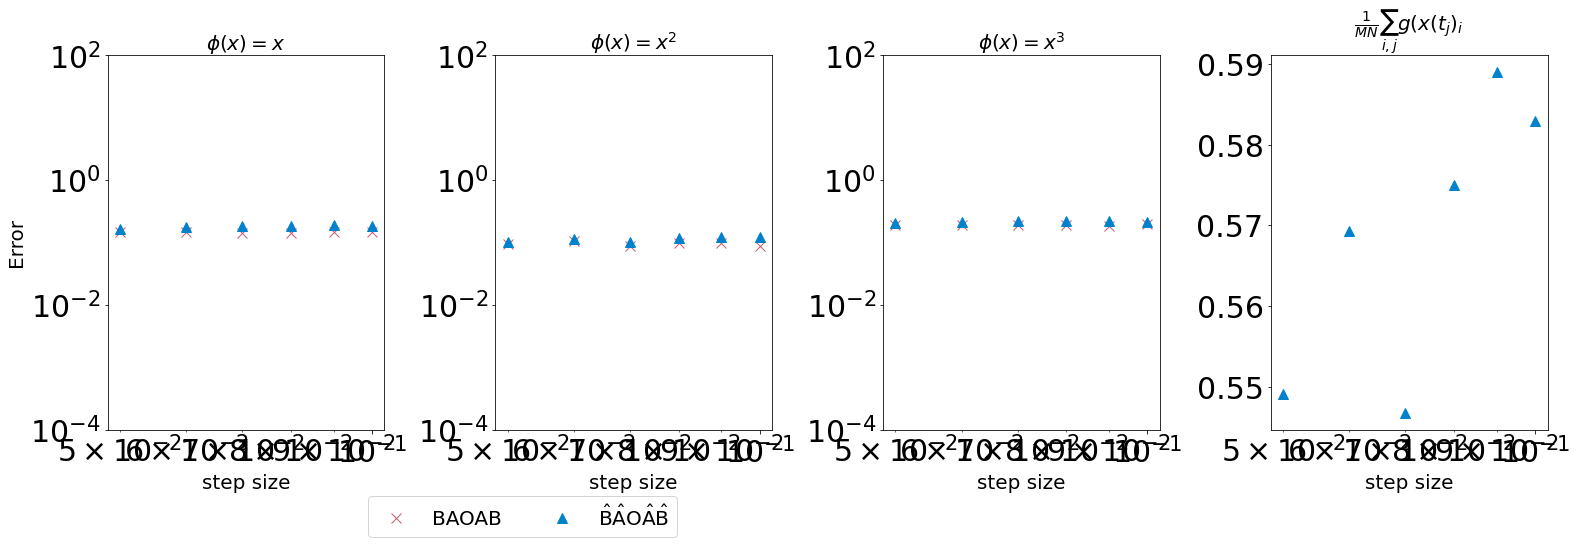

In [21]:
# from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/dw/v2/"
mksize=10
dtlist=[0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
# dtlist = np.array([np.exp(-4.5),np.exp(-4.21),np.exp(-3.93),np.exp(-3.64),np.exp(-3.36),np.exp(-3.07),np.exp(-2.79),np.exp(-2.5),np.exp(-2.21),np.exp(-1.93),np.exp(-1.64),np.exp(-1.36),np.exp(-1.07), np.exp(-0.79), np.exp(-0.5)])

# ###########################################
# ## Interpolate the slope
# ###########################################
T=200
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="BAOAB"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)

#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)
print(mom1_list)

## Transformed 
###############
lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4.txt"))
print(mom1_list)


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogx(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)




ax1.set_ylim([10**(-4),10**2]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**2]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**2]) #change to -7.5 for a=2.5


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
# ax4.set_ylabel("$y$",fontsize=font_size)

# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size)


# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1.5, -0.15))